# Ensemble Methods II - Bagging and Pasting
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. Pasting occurs when the data is not replaced.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

## Loading Moons Dataset

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.15)

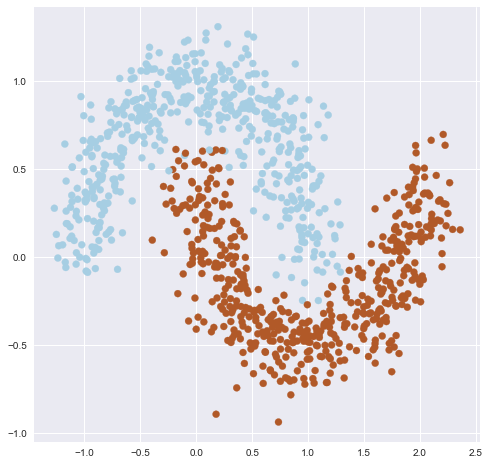

In [4]:
plt.figure(figsize=(8,8))

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Examining Different Models on Training Set

We use a Decision Tree for the classifier

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Bagging

In [7]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 50, max_samples = 100, bootstrap = True, n_jobs=-1)
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=50, n_jobs=-1)

In [8]:
y_pred=bag_clf.predict(X_test)

In [9]:
print(bag_clf.__class__.__name__, accuracy_score(y_test,y_pred))

BaggingClassifier 0.97


### Pasting

In [10]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 50, max_samples = 100, bootstrap = False, n_jobs=-1)
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=50, n_jobs=-1)

In [11]:
y_pred=bag_clf.predict(X_test)

In [12]:
print(bag_clf.__class__.__name__, accuracy_score(y_test,y_pred))

BaggingClassifier 0.97
